# GEMS Market Access (Nelson 2015) Example Usage
## Set up an HTTP client using Python's request library
We use a Session object to store our API key and automatically include it in the header for each request.

Note that we have a `api_key.py` file in the Exchange-Notebooks directory. The file contains only the below line.
```
api_key = 'SECRET'
```

In [1]:
from requests import Session
import pandas as pd
import rasterio
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('..')
from api_key import key

pd.options.display.max_colwidth = 500

s = Session()
s.headers.update({'apikey' : key})
market_url = "https://exchange-1.gems.msi.umn.edu/market/v2"

## Get description for available layers
To get a list of all avilable layers and retrieve their description, `/nelson-travel-time-2015/layer` endpoint is used.

In [2]:
res = s.get(market_url+"/nelson-travel-time-2015/layer")
layers = pd.json_normalize(res.json())
layers

,name,units,description,discrete,id
0,to cities 1,minutes,"Travel time to cities with size >=5,000,000 and <50,000,000 based on Nelson, Andy (2019): Travel time to cities and ports in the year 2015. figshare. Dataset. https://doi.org/10.6084/m9.figshare.7638134.v4",False,276
1,to cities 2,minutes,"Travel time to cities with size >=1,000,000 and <5,000,000 based on Nelson, Andy (2019): Travel time to cities and ports in the year 2015. figshare. Dataset. https://doi.org/10.6084/m9.figshare.7638134.v4",False,277
2,to cities 3,minutes,"Travel time to cities with size >=5,00,000 and <1,000,000 based on Nelson, Andy (2019): Travel time to cities and ports in the year 2015. figshare. Dataset. https://doi.org/10.6084/m9.figshare.7638134.v4",False,278
3,to cities 4,minutes,"Travel time to cities with size >=200,000 and <500,000 based on Nelson, Andy (2019): Travel time to cities and ports in the year 2015. figshare. Dataset. https://doi.org/10.6084/m9.figshare.7638134.v4",False,279
4,to cities 5,minutes,"Travel time to cities with size >=100,000 and <200,000 based on Nelson, Andy (2019): Travel time to cities and ports in the year 2015. figshare. Dataset. https://doi.org/10.6084/m9.figshare.7638134.v4",False,280
5,to cities 6,minutes,"Travel time to cities with size >=50,000 and <100,000 based on Nelson, Andy (2019): Travel time to cities and ports in the year 2015. figshare. Dataset. https://doi.org/10.6084/m9.figshare.7638134.v4",False,281
6,to cities 7,minutes,"Travel time to cities with size >=20,000 and <50,000 based on Nelson, Andy (2019): Travel time to cities and ports in the year 2015. figshare. Dataset. https://doi.org/10.6084/m9.figshare.7638134.v4",False,282
7,to cities 8,minutes,"Travel time to cities with size >=10,000 and <20,000 based on Nelson, Andy (2019): Travel time to cities and ports in the year 2015. figshare. Dataset. https://doi.org/10.6084/m9.figshare.7638134.v4",False,283
8,to cities 9,minutes,"Travel time to cities with size >=5,000 and <10,000 based on Nelson, Andy (2019): Travel time to cities and ports in the year 2015. figshare. Dataset. https://doi.org/10.6084/m9.figshare.7638134.v4",False,284
9,to cities 10,minutes,"Travel time to cities with size >=20,000 and <110,000,000 based on Nelson, Andy (2019): Travel time to cities and ports in the year 2015. figshare. Dataset. https://doi.org/10.6084/m9.figshare.7638134.v4",False,285


## List available objects under all layers
To search all available objects, an area of interest must be set. 

In [3]:
area_of_interest = "0,47,6,52"
params = {
    "bbox": area_of_interest,
    "limit": 20
}

res = s.get(market_url+"/nelson-travel-time-2015/object/search", params=params)

df = pd.json_normalize(res.json())
df.head()

,id,grid_id,t_ranges,t_key,t_description,name,units,description,layer_id
0,187344,3,"[{'begin': None, 'end': None}]",None,None,to cities 3,minutes,"Travel time to cities with size >=5,00,000 and <1,000,000 based on Nelson, Andy (2019): Travel time to cities and ports in the year 2015. figshare. Dataset. https://doi.org/10.6084/m9.figshare.7638134.v4",278
1,187343,3,"[{'begin': None, 'end': None}]",None,None,to cities 2,minutes,"Travel time to cities with size >=1,000,000 and <5,000,000 based on Nelson, Andy (2019): Travel time to cities and ports in the year 2015. figshare. Dataset. https://doi.org/10.6084/m9.figshare.7638134.v4",277
2,187347,3,"[{'begin': None, 'end': None}]",None,None,to cities 6,minutes,"Travel time to cities with size >=50,000 and <100,000 based on Nelson, Andy (2019): Travel time to cities and ports in the year 2015. figshare. Dataset. https://doi.org/10.6084/m9.figshare.7638134.v4",281
3,187342,3,"[{'begin': None, 'end': None}]",None,None,to cities 1,minutes,"Travel time to cities with size >=5,000,000 and <50,000,000 based on Nelson, Andy (2019): Travel time to cities and ports in the year 2015. figshare. Dataset. https://doi.org/10.6084/m9.figshare.7638134.v4",276
4,187358,3,"[{'begin': None, 'end': None}]",None,None,to ports 5,minutes,"Travel time to ports with size ANY based on Nelson, Andy (2019): Travel time to cities and ports in the year 2015. figshare. Dataset. https://doi.org/10.6084/m9.figshare.7638134.v4",292


## Access and vizualize raster data

Example below illustrates how to access and visualize raster data while keeping the returned files in memory.  

**Note: Vizualizing raster data and comparing broad patterns of accessibility by region can capture the distribution of cities, inequalities in infrastructural development, and impact of natural barriers, such as mountain ranges and dense forests, which limit physical access to resources concentrated in urban centers. These data also allow to contrast densely and sparsely populated regions.**

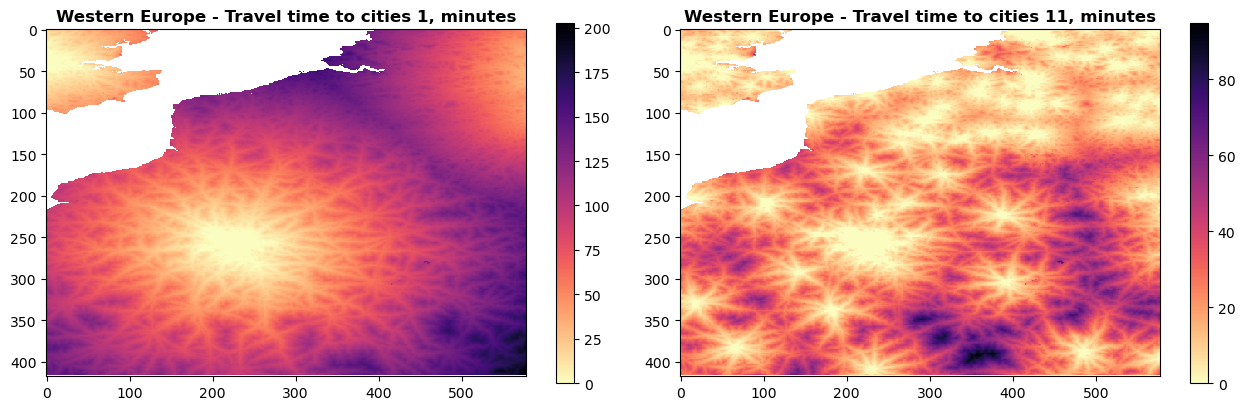

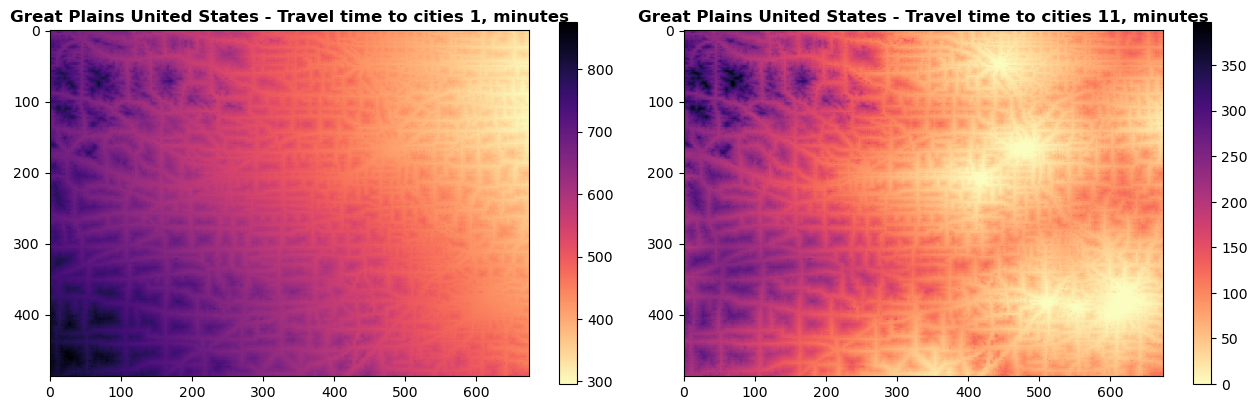

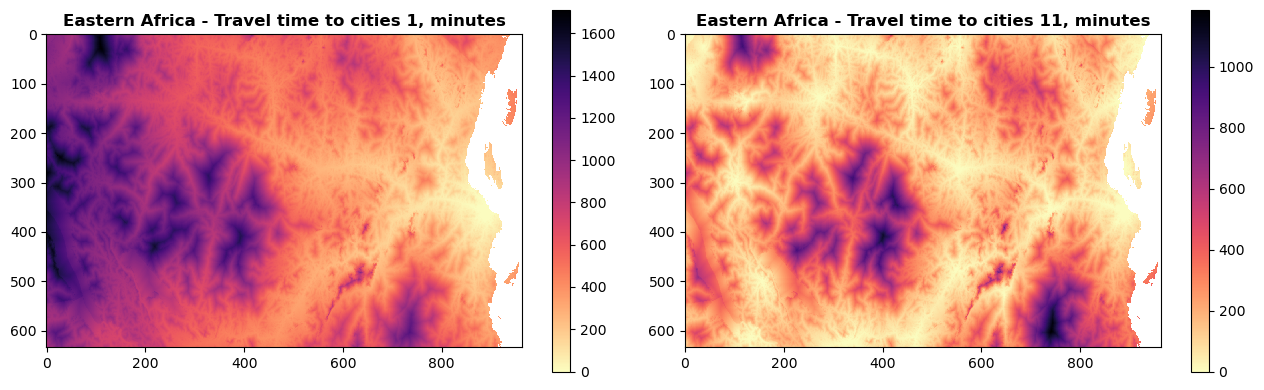

In [4]:
regions_of_interest = {"Western Europe" : "0,47,6,52",
                       "Great Plains United States" : "-101,38,-94,43",
                       "Eastern Africa" : "30,-9,40,-4"
                      }

for region,area_of_interest in regions_of_interest.items():
    fig, axs = plt.subplots(1, 2, figsize=(13, 4))
    params = {
        "bbox": area_of_interest
    }
    ax=0
    for object_id in [187342,187352]:
        res = s.get(market_url + f"/nelson-travel-time-2015/object/{object_id}")
        layer =  res.json()["layer_id"]
        res = s.get(market_url+f"/nelson-travel-time-2015/layer/{layer}")
        name = res.json()["name"]
        res = s.get(market_url + f"/nelson-travel-time-2015/object/{object_id}/raster", params=params)
        raster = res.content
        with rasterio.MemoryFile(raster) as memfile:
            with memfile.open() as dataset:
                data = dataset.read(1)
                data = data.astype("float32")
                data[data==dataset.nodata]=np.nan
                z_plot = axs[ax].imshow(data, interpolation="none", cmap="magma_r")
                axs[ax].set_title(f"{region} - Travel time {name}, minutes", weight="bold")
                plt.colorbar(z_plot,ax=axs[ax])
        ax=ax+1
    plt.tight_layout()

## Sample Point Data

The following example illustrates how to get data values of travel time in minutes for points from their geographic coordinates and combine the results in a tabular format.

In [5]:
points = {
    "name":["point1", "point2", "point3", "point4", "point5"], 
    "lat":[29.26, -2.4, 45.97, 8.11, 34.56], 
    "lon":[-98.54, 25.4, 21.38, -63.2, 81.22]
}

df = pd.DataFrame(points)
   
for object_id in  [187342, 187343, 187344, 187345, 187346, 187347, 187348, 187349, 187350, 187351, 187352, 187353, 187354, 187355, 187356, 187357, 187358]:
    for index,row in df.iterrows():
        params = {
            "lat" : row["lat"],
            "lon" : row["lon"]
        }
        res = s.get(market_url + f"/nelson-travel-time-2015/object/{object_id}/point", params=params)
        df.loc[index, str(object_id)] = res.json()["value"]
df

,name,lat,lon,187342,187343,187344,187345,187346,187347,187348,187349,187350,187351,187352,187353,187354,187355,187356,187357,187358
0,point1,29.26,-98.54,867.0,6.0,146.0,130.0,9.0,221.0,45.0,29.0,24.0,4.0,6.0,4.0,214.0,134.0,244.0,147.0,134.0
1,point2,-2.40,25.40,3144.0,2242.0,1985.0,1409.0,1961.0,1538.0,1586.0,1440.0,1160.0,1407.0,1409.0,1160.0,4292.0,3197.0,3232.0,3215.0,3197.0
2,point3,45.97,21.38,863.0,185.0,413.0,36.0,26.0,115.0,56.0,80.0,35.0,26.0,26.0,26.0,515.0,480.0,509.0,465.0,465.0
3,point4,8.11,-63.20,376.0,431.0,51.0,41.0,259.0,91.0,60.0,39.0,64.0,40.0,41.0,39.0,231.0,470.0,43.0,64.0,43.0
4,point5,34.56,81.22,2272.0,2190.0,2179.0,1964.0,1815.0,1963.0,1779.0,1488.0,1773.0,1779.0,1815.0,1488.0,2886.0,3084.0,2967.0,2950.0,2886.0


**Note: 
Two or more layers can be combined into one layer by recording the minimum pixel value across the layers. For example, travel time to the nearest settlement of  50,000 to 500,000 people, can be computed by taking the minimum value of layers 6 (50,000 to 100,000), 5 (to 100,000 to 200,000), and  4 (200,000 to 500,000). For `point1` from the previous example, the value would equal to 9 minutes (minimum of 221, 9, and 130). The closest any target (city or port) regardless of its size can be computed by taking the minimum of all 17 layers (for `point1` the minimum would be 4 minutes).**

## Get summary statistics
`/stats` endpoint allows to spatially summarize the values of a raster within the area of interest, 

In [6]:
area_of_interest = "30,-9,40,-4"
params = {
    "bbox": area_of_interest
}
for object_id in [187342, 187346, 187350, 187358]:
    print (f"Object {object_id}")
    res = s.get(market_url + f"/nelson-travel-time-2015/object/{object_id}/stats", params=params)    
    res.json()
    df = pd.json_normalize(res.json())
    display (df)

Object 187342


,count,sum,mean,stddev,min,max
0,568695,389993739.0,685.769594,351.297757,0.0,1710.0


Object 187346


,count,sum,mean,stddev,min,max
0,568681,218427790.0,384.095459,212.318898,0.0,1407.0


Object 187350


,count,sum,mean,stddev,min,max
0,568695,91240037.0,160.437558,140.418694,0.0,853.0


Object 187358


,count,sum,mean,stddev,min,max
0,568643,387847975.0,682.058822,372.135344,0.0,1729.0
